In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.ticker import ScalarFormatter
from matplotlib.animation import FuncAnimation
import pandas as pd
from scipy.interpolate import UnivariateSpline
from matplotlib.font_manager import FontProperties
from scipy.interpolate import make_interp_spline


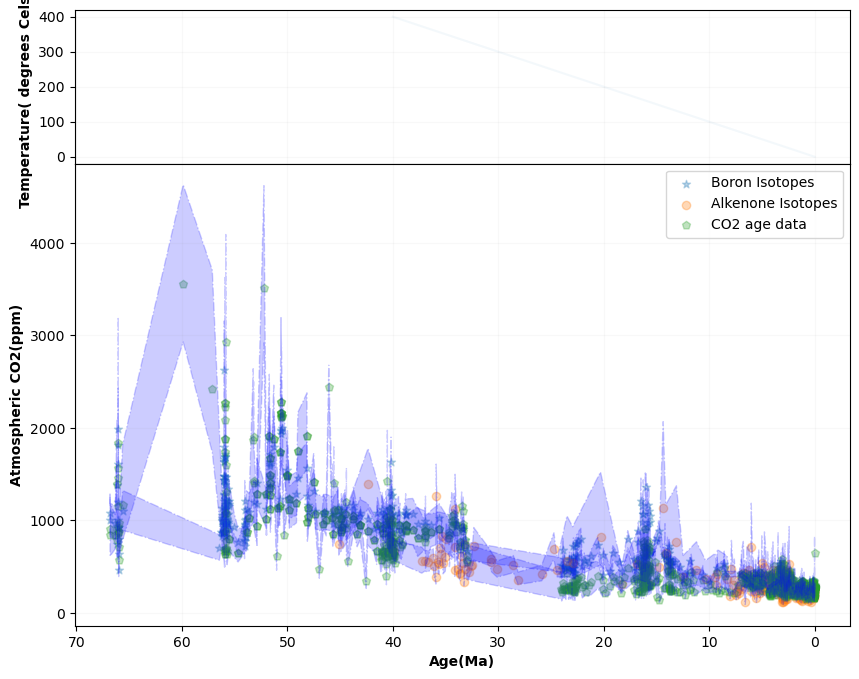

In [2]:
# Adding the temperature over the CO2 concentration curve
# Merging the 3 graphs into one and keeping the error bars

boron_data = pd.read_csv('ea49_rae_suppl_data1(d11B_ph).csv')
alkenone_data = pd.read_csv('ea49_rae_suppl_data1(alkenone_d13C).csv')
co2_age_data = pd.read_csv('age_co2_plot_data.csv')


# Set the x-axis and y-axis data
x1 = boron_data['age']/1000
x2 = alkenone_data['age']/1000
x3 = co2_age_data['age']/1000

# 
y1 = boron_data['xco2']
y1_err_lower1 = boron_data['xco2_16pc']
# y_err_lower2 = data['xco2_alkalinityLow']
y1_err_upper1 = boron_data['xco2_84pc']
# y_err_upper2 = data['xco2_alkalinityHigh']


y2 = alkenone_data['co2']
y2_err_lower = alkenone_data['co2_16pc']
y2_err_upper = alkenone_data['co2_84pc']


y3 = co2_age_data['co2']
y3_err_lower = co2_age_data['co2'].astype(
    float) - co2_age_data['co2_uncertainty_lower'].astype(float)
y3_err_upper = co2_age_data['co2_uncertainty_higher'].astype(
    float) + co2_age_data['co2'].astype(float)


# #Applying Lowess smoothing to the plots
# x1_smooth = np.linspace(min(x2), max(x2), 300)
# spl = make_interp_spline(x2, y1, k=3)
# y1_smooth = spl(x1_smooth)

# Create the figure and the subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(
    10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 3]})

# Plot the three existing datasets in the lower subplot
ax2.scatter(x1, y1, marker="*", alpha=0.3, label="Boron Isotopes")
ax2.scatter(x2, y2, marker = "o", alpha=0.3, label="Alkenone Isotopes")
ax2.scatter(x3, y3, marker = "p", alpha=0.3, label="CO2 age data")

#adding the error bands 
ax2.fill_between(x1, y1_err_lower1, y1_err_upper1, alpha=0.2,
                 antialiased=True, linewidth=1, linestyle='dashdot', color='blue')
ax2.fill_between(x2, y2_err_lower, y2_err_upper, alpha=0.2,
                 antialiased=True, linewidth=1, linestyle='dashdot', color='blue')
ax2.fill_between(x3, y3_err_lower, y3_err_upper, alpha=0.2,
                 antialiased=True, linewidth=1, linestyle='dashdot', color='blue')
ax2.invert_xaxis()
ax2.grid(color="grey", linestyle="-", alpha=0.05)
# ax2.plot(x1_smooth, y1_smooth, color='red')

# Add bold axis labels
font = FontProperties()
font.set_weight('bold')
ax2.set_ylabel("Atmospheric CO2(ppm)", fontproperties=font)

# Plot for temperature in the upper subplot
# Set the x-axis and y-axis data for the new dataset
x4 = [0, 10, 20, 30, 40]
y4 = [0, 100, 200, 300, 400]

ax1.plot(x4, y4, alpha=0.05)
ax1.grid(color="grey", linestyle="-", alpha=0.05)

# Add bold axis labels
ax1.set_ylabel("Temperature( degrees Celsius)", fontproperties=font)
ax2.set_xlabel("Age(Ma)", fontproperties=font)
ax2.legend(loc="upper right")


# Adjusting heights between subplots
plt.subplots_adjust(hspace=0.0)

# Averaging the 3 CO2 plots
# y_avg = np.mean([y1, y2, y3], axis=0)
# axs_avg = axs[2].twinx()
# axs_avg.plot(x3, y_avg, color='red', linewidth=2)


In [ ]:
# ask Lenka about averaging the values since all the plots are clean and available now

# # notes
# the original plot has an uneven y axis to keep it relatively smooth. every 1000 steps the y axis shortens
# the referenced graph also does not have the original temperature data(get confirmation from Lenka and Tapio)
# add the individual scatterplots which could then be commented out. 


#Gaussian smoothing for graph 
#Loess smooth


# try to envelope the error bars like in the book
# Do both to see how it would look like
# Zoom in for both

# Do for CO2 and temperature like in folder
# offset rtmeperature y axis so that it is above co2


# Include captions
# Include method (smoothing in time, average of each time period, etc)
# (include references to Rae et al, Pangea , etc)


# Match style from the book as closely as possible